In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf

In [ ]:
!mkdir -p /root/.kaggle

In [ ]:
import shutil

shutil.move("kaggle.json", "/root/.kaggle/")

'/root/.kaggle/kaggle.json'

In [ ]:
!chmod 600 /root/.kaggle/kaggle.json

In [ ]:
!kaggle datasets list

ref                                                               title                                                    size  lastUpdated                 downloadCount  voteCount  usabilityRating  
----------------------------------------------------------------  -------------------------------------------------  ----------  --------------------------  -------------  ---------  ---------------  
atharvasoundankar/chocolate-sales                                 Chocolate Sales Data 📊🍫                                 14473  2025-03-19 03:51:40.270000          13216        234  1.0              
adilshamim8/student-depression-dataset                            Student Depression Dataset                             467020  2025-03-13 03:12:30.423000           5244         86  1.0              
abdulmalik1518/mobiles-dataset-2025                               Mobiles Dataset (2025)                                  20314  2025-02-18 06:50:24.370000          18491        305  1.0          

In [ ]:
!kaggle datasets download -d ashishjangra27/doodle-dataset

Dataset URL: https://www.kaggle.com/datasets/ashishjangra27/doodle-dataset
License(s): CC0-1.0


In [ ]:
import zipfile

zip_ref = zipfile.ZipFile('/content/doodle-dataset.zip')
zip_ref.extractall()
zip_ref.close()

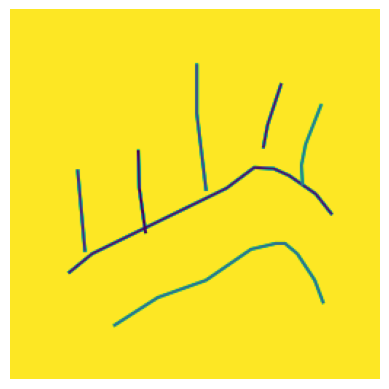

In [ ]:
import matplotlib.image as mpimg
img = mpimg.imread('/content/doodle/The Great Wall of China/4504456316059648.png')
imgplot = plt.imshow(img)
plt.axis(False);

In [ ]:
import os

for dirpath, dirnames, filenames in os.walk('doodle'):
  print(f'There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}.')

There are 340 directories and 0 images in doodle.
There are 0 directories and 3000 images in doodle/wheel.
There are 0 directories and 3000 images in doodle/bowtie.
There are 0 directories and 3000 images in doodle/jail.
There are 0 directories and 3000 images in doodle/knee.
There are 0 directories and 3000 images in doodle/cooler.
There are 0 directories and 3000 images in doodle/flamingo.
There are 0 directories and 3000 images in doodle/hexagon.
There are 0 directories and 3000 images in doodle/train.
There are 0 directories and 3000 images in doodle/paint can.
There are 0 directories and 3000 images in doodle/violin.
There are 0 directories and 3000 images in doodle/bathtub.
There are 0 directories and 3000 images in doodle/parachute.
There are 0 directories and 3000 images in doodle/harp.
There are 0 directories and 3000 images in doodle/watermelon.
There are 0 directories and 3000 images in doodle/crayon.
There are 0 directories and 3000 images in doodle/pizza.
There are 0 direc

#Fitting the Model

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255,validation_split=0.2)
test_datagen = ImageDataGenerator(rescale=1./255)

dir = '/content/doodle'

In [ ]:
train_data = train_datagen.flow_from_directory(directory=dir,
                                               target_size=(224,224),
                                               batch_size=32,
                                               subset='training',
                                               class_mode='categorical')

test_data = test_datagen.flow_from_directory(directory=dir,
                                             target_size=(224,224),
                                             batch_size=32,
                                             class_mode='categorical')

Found 816000 images belonging to 340 classes.
Found 1020000 images belonging to 340 classes.


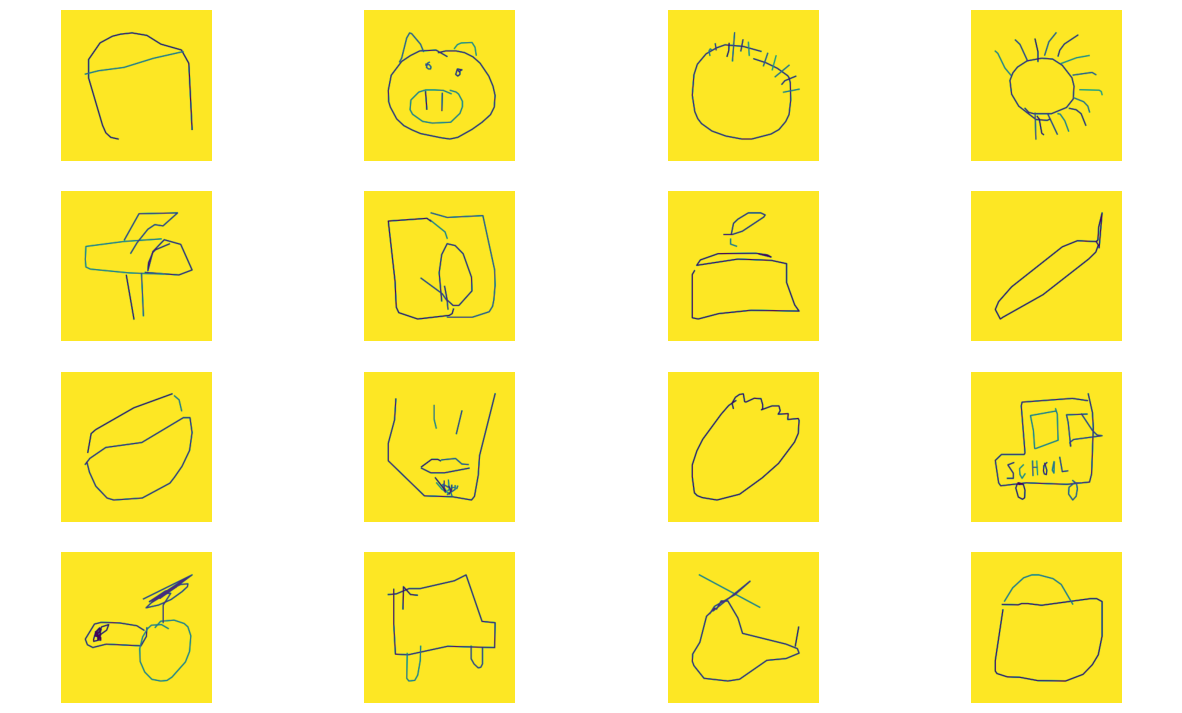

In [ ]:
import random
from PIL import Image

images = []
for folder in os.listdir(dir):
  for image in os.listdir(dir + '/' + folder):
    images.append(os.path.join(dir, folder, image))

plt.figure(1, figsize=(15,9))
plt.axis('off')
n = 0
for i in range(16):
  n += 1
  random_img = random.choice(images)
  imgs = mpimg.imread(random_img)
  plt.subplot(4, 4, n)
  plt.axis('off')
  plt.imshow(imgs)
plt.show();

In [ ]:
resnet_url = 'https://www.kaggle.com/models/google/resnet-v2/TensorFlow2/50-feature-vector/2'
efficient_url = 'https://www.kaggle.com/models/google/resnet-v2/TensorFlow2/b0-feature-vector/1'

In [ ]:
import tensorflow_hub as hub

In [ ]:
IMAGE_SHAPE = (224,224)

In [ ]:
def create_model(model_url, num_classes=340):
  feature_extraction_layer = hub.KerasLayer(model_url,
                                            trainable=False,
                                            name='feature_extraction_layer',
                                            input_shape = IMAGE_SHAPE + (3, ))
  model = tf.keras.Sequential([
      tf.keras.layers.Lambda(lambda x: feature_extraction_layer(x)),
      tf.keras.layers.Dense(num_classes,activation='softmax',name='output_layer')
  ])

  return model

In [ ]:
resnet_model = create_model(resnet_url,
                            num_classes=train_data.num_classes)

In [ ]:
train_data.num_classes

340

In [ ]:
resnet_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lambda (Lambda)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_layer (Dense)                 │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
resnet_model.weights

[]

In [ ]:
optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3)
resnet_model.compile(loss='categorical_crossentropy',
                     optimizer=optimizer,
                     metrics=['accuracy'])

In [ ]:
resnet_history = resnet_model.fit(train_data,
                                  batch_size=32,
                                  epochs=5,
                                  steps_per_epoch = len(train_data),
                                  validation_data=test_data,
                                  validation_steps=len(test_data))

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
